# Introducción a la optimización
### Universidad Nacional de Colombia
### Semana 1

Paulina Castillo

ancastillov@unal.edu.co

## 1) Datos de n días del precio de bitcoin

Haré un modelo polinomial que reciba los datos del bitcoin de 7 días y describa el comportamiento los siguientes 7 a partir de interpolación con los datos iniciales.



In [5]:
precio = #Valores del 1 al 8 del marzo
[
44420
43913
42463
39143
39396
38403
38025
38745
]




8-element Vector{Int64}:
 44420
 43913
 42463
 39143
 39396
 38403
 38025
 38745

In [6]:
n = length(precio) #Número de días a mi preferencia, este caso 7
dias = [i for i in 1:n]

8-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 8

Ya con estos dos pasos es esencial, plantear nuestro problema.

In [1]:
using Pkg 
Pkg.add("Plots")

    Updating registry at `C:\Users\anapa\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\anapa\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\anapa\.julia\environments\v1.7\Manifest.toml`


In [3]:
using Plots

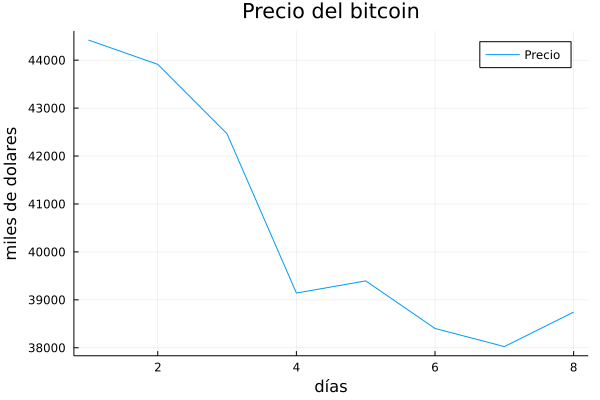

In [32]:
plot(precio, label="Precio",
    xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin") #Grafica de los precios escogidos

In [22]:
using SpecialMatrices #Usados para poder manipular la Matriz de Vandermont

In [23]:
matrix = Vandermonde(dias) # Creo una matriz de tamaño nxn de vandermont  buscando interpolar mis datos
Tmatrix = transpose(matrix)
A = Tmatrix*matrix # metodo de minimos cuadrados
b = Tmatrix*precio
x = A\b 
 #el resultado es un vector con los coeficientes de mi polinomio

8-element Vector{Float64}:
  160059.46016926627
 -286165.76005492767
  269272.3735221243
 -127529.58689455429
   33283.1026459566
   -4860.004740815467
     372.03665533806463
     -11.621666842798055

In [24]:
function f(a::Int) # Polinomio evaluado en a con los valores anteriores
    poly = 0 
    for i in 1:n
        poly += x[i]*a^(i-1)
    end
    return(poly)
end


f (generic function with 1 method)

In [25]:
# predicciones

# Las predicciones para la siguiente semana son

pronostico = Vector{Float64}()
for i in 1:7 
    append!(pronostico, f(7+i))
end
println(pronostico)

[38745.00016500428, -51962.53936893493, -653408.3946184516, -2.9461844378096163e6, -9.565951925262332e6, -2.5615095401054025e7, -6.005081541859937e7]


In [27]:
interpolacion = Vector{Float64}() #verificamos graficamente que la interpolación sea efectiva
for i in 1:7 
    append!(interpolacion, f(i))
end
println(interpolacion)

[44419.99963554503, 43913.00220644242, 42462.99421121215, 39143.00853423067, 39395.992366652936, 38403.00413836166, 38024.99874251336]


Valores de precio en miles de dolares (real) de la semana son

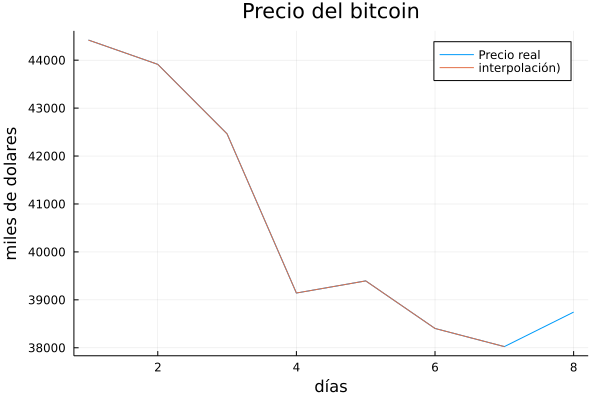

In [31]:
plot([precio,interpolacion],label=["Precio real" "interpolación)"],
    xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin")

In [20]:
Valores=[ #valores reales del bitcoin del9 al 15 de marzo
39581
39671
37792
38814
38730
39416
41929
]

7-element Vector{Int64}:
 39581
 39671
 37792
 38814
 38730
 39416
 41929

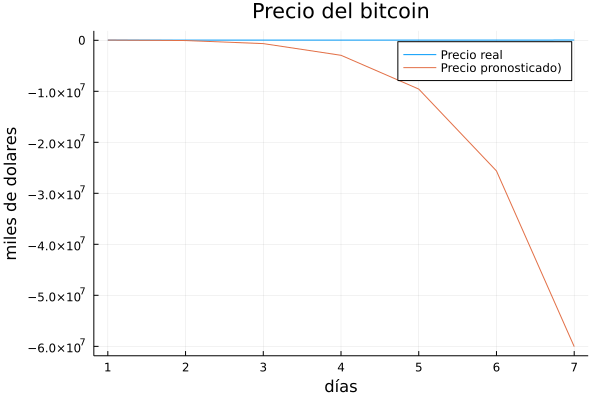

In [26]:
plot([Valores,pronostico], label=["Precio real" "Precio pronosticado)"]
    ,xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin") #Grafica de los precios reales versus los pronosticados

In [35]:
diferencia = Valores-pronostico #el error absoluto de las predicciones 


7-element Vector{Float64}:
    835.9998349957168
  91633.53936893493
 691200.3946184516
      2.9849984378096163e6
      9.604681925262332e6
      2.5654511401054025e7
      6.009274441859937e7

In [36]:
eror_individual=(diferencia)./Valores *100 #porcentaje error pronosticado al real

7-element Vector{Float64}:
      2.1121240873037994
    230.98368926655473
   1828.95955392266
   7690.520012906725
  24799.075458978394
  65086.542016069674
 143320.2423587478

In [14]:
error_promedio = sum(diferencia.^2)/7

6.244197389907224e14

## Analisis

Vemos que el día 8, es decir el primero que se pronostica, tiene un error de 800 dolares, lo cual resulta en un error del 2%, lo que yo consideraría un buen error. Este metodo tiene  problemas ya que fluctua  demasiado y que además al tender infinito crecerá (o decrecerá) de maneras absurdas, las cuales no son utiles a la hora de predecir muchos valores adeante. Mi conclusión es que epuede ser util para modelar de manera inmediata el precio del bitcoin.



##  2) datos mensuales del bitcoin con base a otros comodines

A la hora de relacionar el precio del bitcoin con otros comodines se hará exactamente el mismo proceso descrito anteiormente con la diferencia de que los valores ingresados en la matriz de vandermont ya no serán los días de 1 a n, si no los promedios mensuales de los precios de los comodines en el mes según la pág :https://es.investing.com/. Se predecirán los primeros valores promedios del año 2022 (enero, febrero y marzo)

In [64]:
#Valores promedio en mes de enero 2021 a diciembre 2021

bitcoin =reverse( 
[
50826
61219
55130
46266
43932
35798
35110
44893
55938
53402
45330
35063
])

petroleo=
reverse(
[
73
78
82
76
70
73
73
67
65
66
61
54
])



plata=
reverse(
[
22
24
23
23
24
26
27
27
26
25
28
26
])

oro =
reverse([
1792
1821
1783
1781
1759
1808
1840
1850
1761
1723
1803
1903
])



12-element Vector{Int64}:
 1903
 1803
 1723
 1761
 1850
 1840
 1808
 1759
 1781
 1783
 1821
 1792

In [71]:
#valores de los comodines enero, febrero y marzo 2022


bitcoin_real=reverse([41238
40056
40465])


3-element Vector{Int64}:
 40465
 40056
 41238

In [65]:
function coso(p)
    n = length(bitcoin) #Número de meses(12) a mi preferencia
    matrix = Vandermonde(p) # Creo una matriz de tamaño nxn de vandermont  buscando interpolar mis datos
    Tmatrix = transpose(matrix)
    A = Tmatrix*matrix # metodo de minimos cuadrados
    b = Tmatrix*bitcoin
    x = A\b 
end



coso (generic function with 1 method)

In [66]:
coso(vec(petroleo)) #coeficientes del polinomio según comodin
coso(vec(oro))
coso(vec(plata))

12-element Vector{Float64}:
 188786.2319388013
  -6702.188469179753
    -59.99556163766554
      4.000335857817275
      1.8287640718896155e-5
      8.687262227191853e-7
      3.78429918996171e-8
      1.5519232383403633e-9
      5.911146028434285e-11
      2.1488553476440643e-12
      6.532847275345233e-14
      1.9892665953730065e-15

In [67]:
function f_p(a::Int) # Polinomio con los valores anteriores petroleo
    poly = 0 
    for i in 1:n
        poly += coso(petroleo)[i]*a^(i-1)
    end
    return(poly)
end



function f_pl(a::Int) # Polinomio con los valores anteriores plata
    poly = 0 
    for i in 1:n
        poly += coso(oro)[i]*a^(i-1)
    end
    return(poly)
end

function f_o(a::Int) # Polinomio con los valores anteriores oro
    poly = 0 
    for i in 1:n
        poly += coso(plata)[i]*a^(i-1)
    end
    return(poly)
end









f_o (generic function with 1 method)

In [68]:
#Pronosticos según comodin

pronostico_p = Vector{Float64}() #petroleo
pronostico_pl = Vector{Float64}() #plata
pronostico_o = Vector{Float64}() #oro

for i in 1:3 
    append!(pronostico_p, f_p(petroleo_real[i]))
end


for i in 1:3 
    append!(pronostico_pl, f_pl(plata_real[i]))
end

for i in 1:3 
    append!(pronostico_o, f_o(oro_real[i]))
end




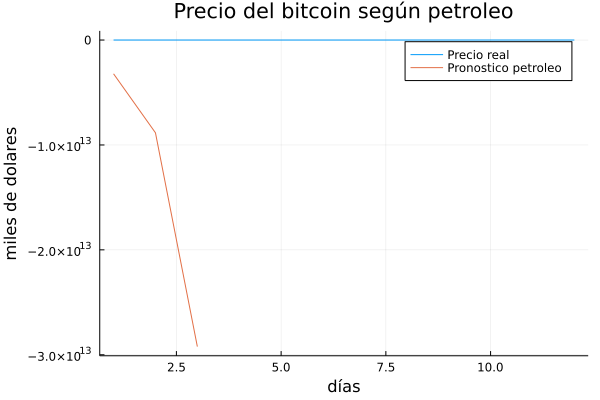

In [81]:
plot([bitcoin,pronostico_p], 
    label=["Precio real" "Pronostico" ]
    ,xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin según petroleo") 
#Grafica de los precios reales versus los pronosticados

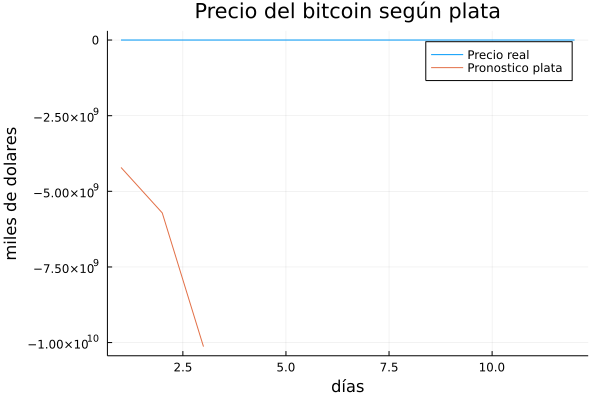

In [80]:
plot([bitcoin,pronostico_pl], 
    label=["Precio real"  "Pronostico" ]
    ,xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin según plata") 
#Grafica de los precios reales versus los pronosticados

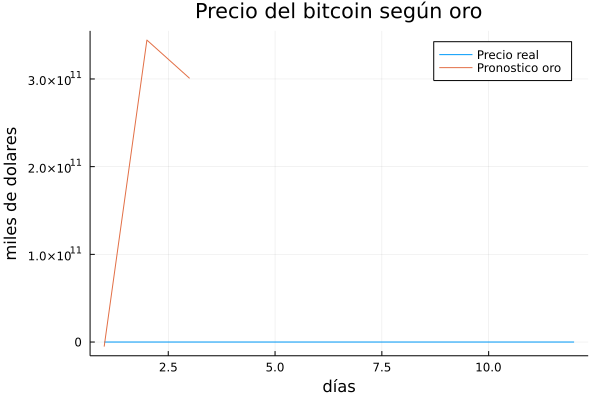

In [83]:
plot([bitcoin,pronostico_o], 
    label=["Precio real"  "Pronostico oro"]
    ,xlabel="días", ylabel="miles de dolares", title = "Precio del bitcoin según oro") 
#Grafica de los precios reales versus los pronosticados

In [72]:
error_individual_p = abs.(pronostico_p-bitcoin_real)./petroleo_real
error_individual_pl = abs.(pronostico_pl-bitcoin_real)./plata_real
error_individual_o = abs.(pronostico_o-bitcoin_real)./oro_real

println(error_individual_p)
println(error_individual_pl)
println(error_individual_o)

[3.8285082851434105e10, 9.11415941801516e10, 2.5411337006627856e11]
[1.8309312894997326e8, 2.3806839070257148e8, 3.897171057819695e8]
[2.8563972694298006e6, 1.8287080390769008e8, 1.513207569113789e8]


In [74]:
error_promedio_p = sum((abs.(pronostico_p-bitcoin_real)).^2)/12
error_promedio_pl = sum((abs.(pronostico_pl-bitcoin_real)).^2)/12
error_promedio_o = sum((abs.(pronostico_o-bitcoin_real)).^2)/12

println(error_promedio_p)
println(error_promedio_pl)
println(error_promedio_o)

7.854056898629327e25
1.2754158673028219e19
1.7417164622212329e22


## Analisis

Vemos que el error promedio menor es el de la plata pero dentro del modelo creado, ningún pronostico realmente es bueno. Por lo que se  puede afirmar que este modelo no predice correctamente los valores del bitcoin a partir de otros comodines.